# Environment setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Getting all data.

In [2]:
train=pd.read_csv("../input/titanic/train.csv",index_col="PassengerId")
test=pd.read_csv("../input/titanic/test.csv",index_col="PassengerId")
submission=pd.read_csv("../input/titanic/gender_submission.csv",index_col = "PassengerId")

# Exploring the Data

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
train.size , train.shape

(9801, (891, 11))

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Gender/sex analysis

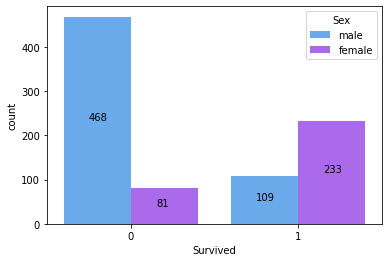

In [8]:
ax = sns.countplot(x = train["Survived"] , hue= train["Sex"] , palette= "cool")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()/2))
plt.show()

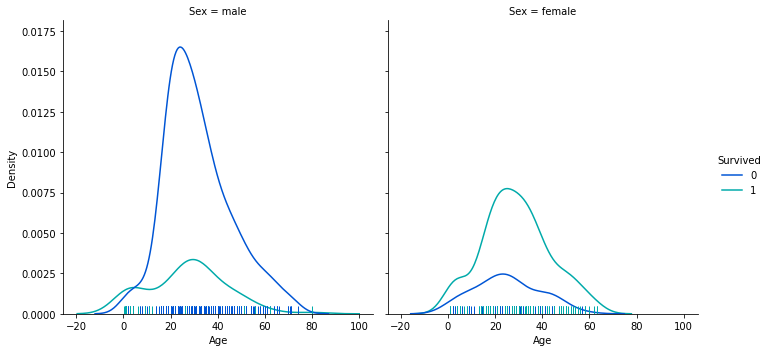

In [9]:
ax = sns.displot(data=train, x="Age", hue="Survived" , col="Sex",kind = "kde" ,rug= True ,palette= "winter")

### Age analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

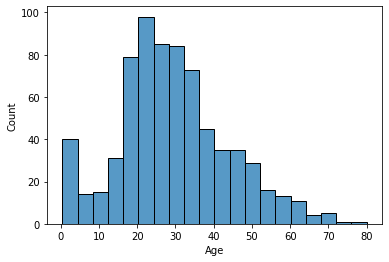

In [10]:
sns.histplot(data = train ,x = 'Age' )

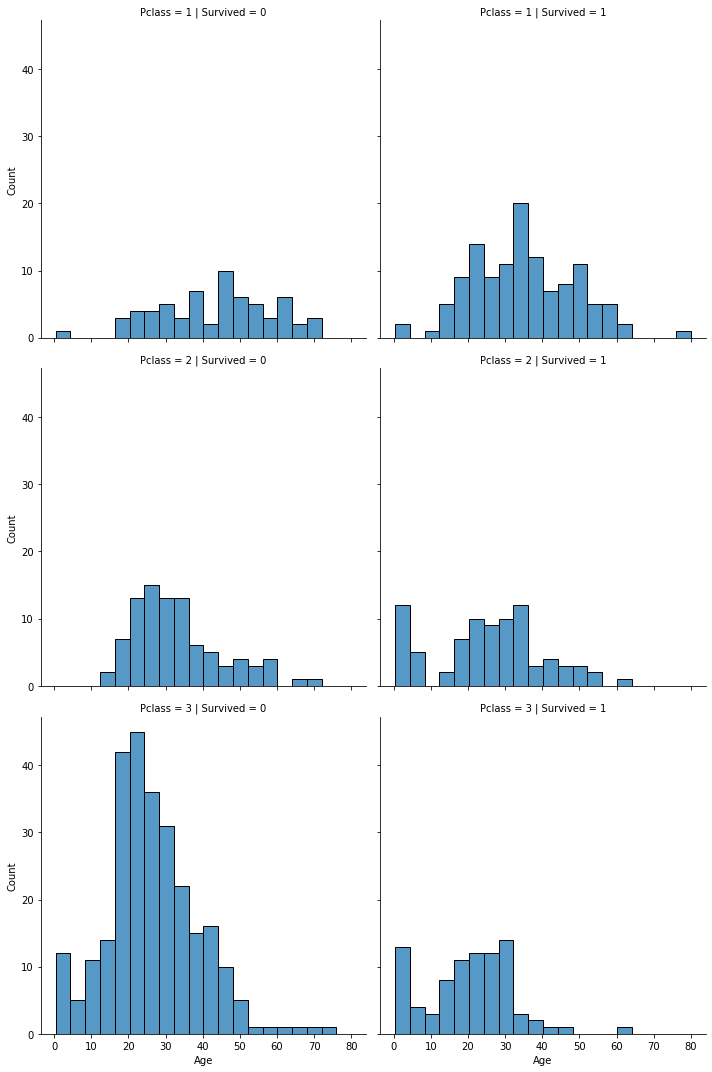

In [11]:
ax = sns.displot(data=train, x="Age", col="Survived" , row = "Pclass");

### Cheking and fixing null values

In [12]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
train.drop(["Cabin"],axis = 1,inplace=True)

In [14]:
train['Age'].fillna(value = train["Age"].mean(), inplace = True)

In [15]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train["Embarked"].fillna(value = 'S' , inplace = True)
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
test.drop(["Cabin"],axis = 1 , inplace = True)

In [19]:
test['Age'].fillna(value = test["Age"].mean(), inplace = True)
test["Fare"].fillna(value = test["Fare"].mean(),inplace = True)

In [20]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## cleaning data so that we can use it for model training

# ML model

## Getting features and target value.

In [21]:
X_train = train.drop(["Survived"],axis = 1)
X_train.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [22]:
Y_train = train["Survived"]
Y_train[:10]

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Survived, dtype: int64

## Using sklearn and Randomforestclassification

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier